<a href="https://colab.research.google.com/github/prateek-sagar/machine_learning/blob/bank_churn/BankChurnAnalyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Churn Analyse**

**Objective**
To analyse the data of churning of bank customers and predict them which can help in focus to those customers.

Data source is YBI Foundation

###**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Import Data and Read

In [2]:
# Import Data
churn_data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

##Describe Data

In [3]:
# Look at first Few Columns
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Show the columns
churn_data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


It gives any duplicate record of customer, if any.

In [6]:
# Check any duplicacy in availabel data
churn_data.duplicated('CustomerId').sum()

0

We can replace our string value to numeric as Geography and Gender contain string objects, so replace it.

In [7]:
# It will return the unique in a specified column such as geography and gender which further help to replace
print(churn_data['Geography'].unique())
print(churn_data['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [8]:
# Replace the object with int value which is easy to understand for machine
churn_data.replace({'Geography': {'France': 2, 'Spain':1, 'Germany':0}}, inplace=True)
churn_data.replace({'Gender': {'Female': 1, 'Male': 0}}, inplace=True)

In [9]:
# Replace the int with binary integers which helps to classify
churn_data.replace({'Num Of Products':{1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [10]:
# Extracting the balance column data using feature engineering and make a new column
# of named as Zero Balnce which holds the categorical value of 0 and 1
churn_data.loc[(churn_data['Balance']==0), 'Churn'].value_counts()
churn_data['Zero Balance'] = np.where(churn_data['Balance'] > 0, 1, 0)

In [11]:
# Look at the data after replacing
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
0,15634602,Hargrave,619,2,1,42,2,0.00,0,1,1,101348.88,1,0
1,15647311,Hill,608,1,1,41,1,83807.86,0,0,1,112542.58,0,1
2,15619304,Onio,502,2,1,42,8,159660.80,1,1,0,113931.57,1,1
3,15701354,Boni,699,2,1,39,1,0.00,1,0,0,93826.63,0,0
4,15737888,Mitchell,850,1,1,43,2,125510.82,0,1,1,79084.10,0,1


#**Data Visualisation**

<Axes: >

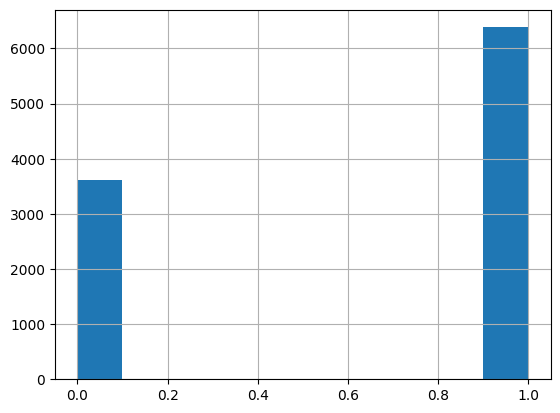

In [12]:
# Visualise for column of Zero Balance
churn_data['Zero Balance'].hist()

In [13]:
# groupby function is the analyses of two data columns => Churn and Geography
churn_data.groupby(['Churn', 'Geography']).count()

CustomerId  Surname  CreditScore  Gender   Age  Tenure  \
Churn Geography                                                           
0     0                1695     1695         1695    1695  1695    1695   
      1                2064     2064         2064    2064  2064    2064   
      2                4204     4204         4204    4204  4204    4204   
1     0                 814      814          814     814   814     814   
      1                 413      413          413     413   413     413   
      2                 810      810          810     810   810     810   

                 Balance  Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                                
0     0             1695             1695             1695              1695   
      1             2064             2064             2064              2064   
      2             4204             4204             4204              4204   
1     0              814              814              814               814   
      1              413              413              413               413   
      2              810              810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      1695          1695  
      1                      2064          2064  
      2                      4204          4204  
1     0                       814           814  
      1                       413           413  
      2                       810           810

In [14]:
churn_data.groupby(['Churn', 'Zero Balance']).count()

CustomerId  Surname  CreditScore  Geography  Gender   Age  \
Churn Zero Balance                                                              
0     0                   3117     3117         3117       3117    3117  3117   
      1                   4846     4846         4846       4846    4846  4846   
1     0                    500      500          500        500     500   500   
      1                   1537     1537         1537       1537    1537  1537   

                    Tenure  Balance  Num Of Products  Has Credit Card  \
Churn Zero Balance                                                      
0     0               3117     3117             3117             3117   
      1               4846     4846             4846             4846   
1     0                500      500              500              500   
      1               1537     1537             1537             1537   

                    Is Active Member  Estimated Salary  
Churn Zero Balance                                      
0     0                         3117              3117  
      1                         4846              4846  
1     0                          500               500  
      1                         1537              1537

#**Features from Data**
---
## And defining the dependent(y) and independent variables(X)

In [15]:
churn_data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [16]:
# Define X and y for prediction
# Drop some columns of actual data and store them as an Independent variable (X)
X = churn_data.drop(['Churn', 'Surname', 'CustomerId'], axis=1)
# Dependent variable
y = churn_data['Churn']

In [17]:
X.shape, y.shape

((10000, 11), (10000,))

In [18]:
y.count()

10000

<Axes: xlabel='Churn', ylabel='count'>

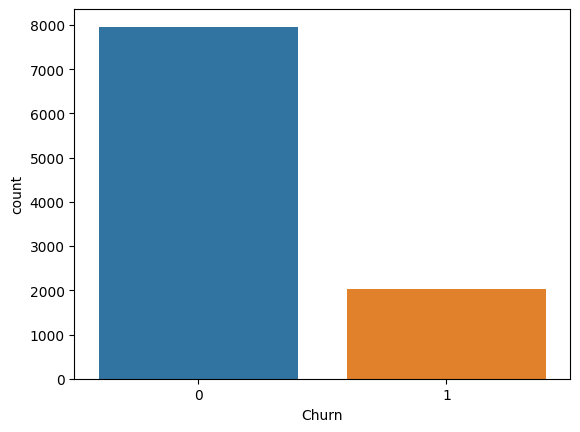

In [19]:
# Visualise the churn column on plot visualisation
sns.countplot(x='Churn', data=churn_data)

#**Random Sampling**
##Dealing with data imbalancing

##Under Sample

In [20]:
# import Random under sampler for under
from imblearn.under_sampling import RandomUnderSampler

In [21]:
# Using Random under sampler
rus = RandomUnderSampler(random_state=2529)

In [22]:
# fit data on RandomUnderSampler
X_rus, y_rus = rus.fit_resample(X, y)

In [23]:
X_rus.shape, y_rus.shape

((4074, 11), (4074,))

<Axes: ylabel='Frequency'>

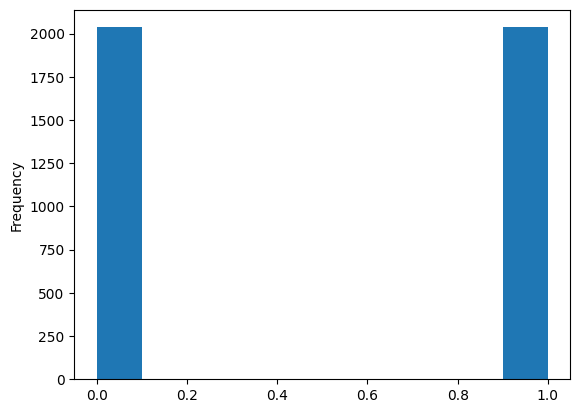

In [24]:
# Plot after under sampling
y_rus.plot(kind='hist')

##Over Sample

In [25]:
# import Random over sampler for over
from imblearn.over_sampling import RandomOverSampler

In [26]:
# Using Random over sampler
ros = RandomOverSampler(random_state=2529)

In [27]:
# fit data on RandomOverSampler
X_ros, y_ros = ros.fit_resample(X, y)

In [28]:
y_ros.shape, y_ros.value_counts()

((15926,),
 1    7963
 0    7963
 Name: Churn, dtype: int64)

<Axes: ylabel='Frequency'>

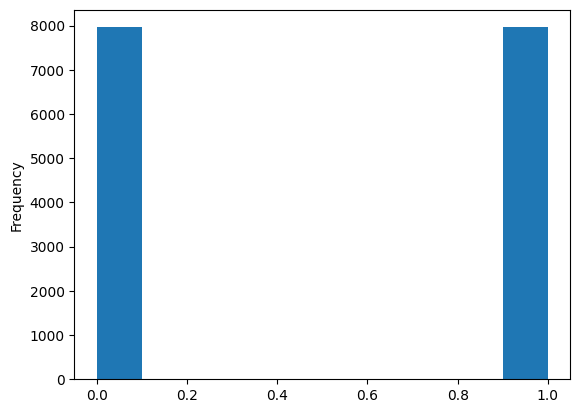

In [29]:
# Plot after over sampling
y_ros.plot(kind='hist')

#**Train Test Split**

In [30]:
#Import train test split for split the data
from sklearn.model_selection import train_test_split

In [31]:
# Originial Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2529)

In [32]:
# Under sample Data
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, random_state=2529)

In [33]:
# Over Sample data
X_ros_train, X_ros_test, y_ros_train, y_ros_test = train_test_split(X_ros, y_ros, random_state=2529)

#**Preprocessing the data**
###Preprocessing include Stardisation and Normalisation, we use standardisation

Standardize Original Data

In [34]:
# Import standard scaler from sklearn for standardize
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()

In [36]:
X_train[['CreditScore', 'Age', 'Tenure', 'Estimated Salary', 'Balance']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Estimated Salary', 'Balance']])

In [37]:
X_test[['CreditScore', 'Age', 'Tenure', 'Estimated Salary', 'Balance']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Estimated Salary', 'Balance']])

Standardize Under Sample Data

In [38]:
X_rus_train[['CreditScore', 'Age', 'Tenure', 'Estimated Salary', 'Balance']] = sc.fit_transform(X_rus_train[['CreditScore', 'Age', 'Tenure', 'Estimated Salary', 'Balance']])

In [39]:
X_rus_test[['CreditScore', 'Age', 'Tenure', 'Estimated Salary', 'Balance']] = sc.fit_transform(X_rus_test[['CreditScore', 'Age', 'Tenure', 'Estimated Salary', 'Balance']])

Standardize Over Sample Data

In [40]:
X_ros_train[['CreditScore', 'Age', 'Tenure', 'Estimated Salary', 'Balance']] = sc.fit_transform(X_ros_train[['CreditScore', 'Age', 'Tenure', 'Estimated Salary', 'Balance']])

In [41]:
X_ros_test[['CreditScore', 'Age', 'Tenure', 'Estimated Salary', 'Balance']] = sc.fit_transform(X_ros_test[['CreditScore', 'Age', 'Tenure', 'Estimated Salary', 'Balance']])

#**Modeling**
##**Random Forest Classifier**

In [42]:
#import random forest
from sklearn.ensemble import RandomForestClassifier

In [43]:
# create model
model_rfc = RandomForestClassifier()

##**For original data**

In [44]:
# train model on original data
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

###Prediction

In [45]:
# predict on original data
y_pred = model_rfc.predict(X_test)


###Model Accuracy

In [46]:
# Accuracy libraries
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [47]:
# create confusion
cm = confusion_matrix(y_test, y_pred, labels=model_rfc.classes_)
cm

array([[1949,   63],
       [ 292,  196]])

In [48]:
# Display of confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=model_rfc.classes_)

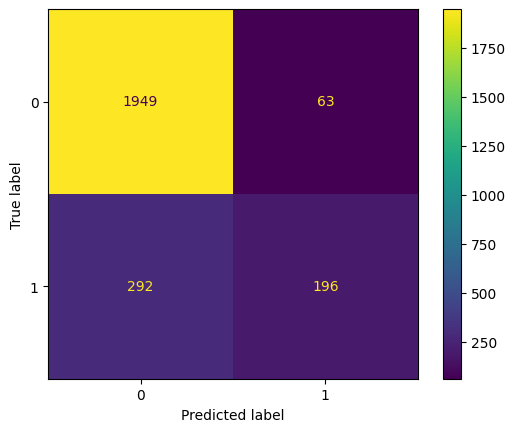

In [49]:
disp.plot()

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2012
           1       0.76      0.40      0.52       488

    accuracy                           0.86      2500
   macro avg       0.81      0.69      0.72      2500
weighted avg       0.85      0.86      0.84      2500



##**Tuning the Model**

In [51]:
# import the important libraries for tuning the model
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [52]:
#Set pipeline
pipeline = Pipeline([("rf",RandomForestClassifier())])

In [53]:
# give the parameter for pipeline
param_grid = {
    'rf__max_depth': [1, 3, 6],
    'rf__max_features': [2, 3],
    'rf__min_samples_leaf': [3, 4, 5],
    'rf__n_estimators': [100, 200, 300]
}

In [54]:
grid = GridSearchCV(pipeline, param_grid, refit=True, verbose=1, cv=2)

In [55]:
# Fit data on tuning model
grid.fit(X_train, y_train)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


GridSearchCV(cv=2, estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [1, 3, 6], 'rf__max_features': [2, 3],
                         'rf__min_samples_leaf': [3, 4, 5],
                         'rf__n_estimators': [100, 200, 300]},
             verbose=1)

In [56]:
print(grid.best_estimator_)

Pipeline(steps=[('rf',
                 RandomForestClassifier(max_depth=6, max_features=3,
                                        min_samples_leaf=4,
                                        n_estimators=300))])


In [57]:
# grid pred on tuning model
grid_pred = grid.predict(X_test)

In [58]:
grid_cm = confusion_matrix(y_test, grid_pred)

In [59]:
grid_con_disp = ConfusionMatrixDisplay(confusion_matrix=grid_cm,  display_labels=model_rfc.classes_)

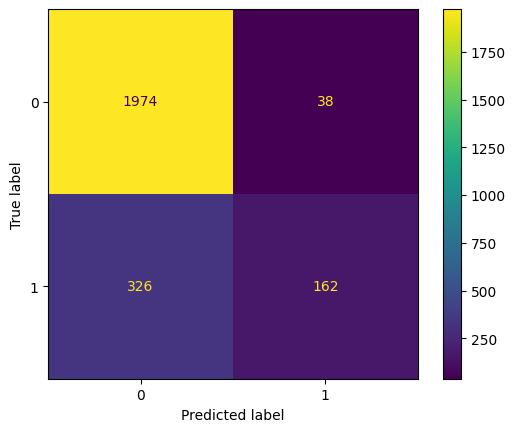

In [60]:
grid_con_disp.plot()

In [61]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2012
           1       0.81      0.33      0.47       488

    accuracy                           0.85      2500
   macro avg       0.83      0.66      0.69      2500
weighted avg       0.85      0.85      0.83      2500



##**For Under Sample data**

In [62]:
# Model for Under sample data
rfc_rus = RandomForestClassifier()

In [63]:
# fit data
rfc_rus.fit(X_rus_train, y_rus_train)

RandomForestClassifier()

###Prediction
###Under Sample Data

In [64]:
# predict for udner sample data without tuning
y_pred_rus = rfc_rus.predict(X_rus_test)

###Model Accuracy

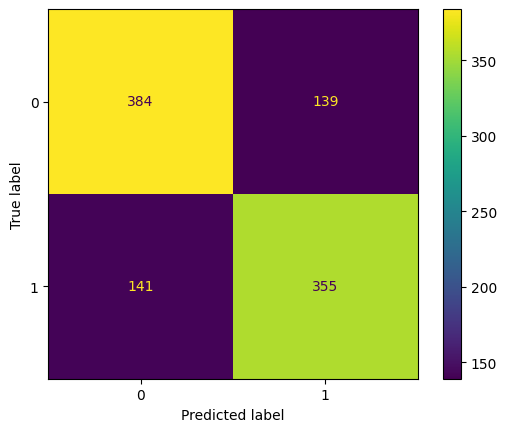

In [65]:
rus_cm = confusion_matrix(y_rus_test, y_pred_rus)
rus_disp = ConfusionMatrixDisplay(confusion_matrix=rus_cm, display_labels=rfc_rus.classes_)
rus_disp.plot()

In [66]:
print(classification_report(y_rus_test, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       523
           1       0.72      0.72      0.72       496

    accuracy                           0.73      1019
   macro avg       0.73      0.72      0.72      1019
weighted avg       0.73      0.73      0.73      1019



In [67]:
# Tuning Model for under sample data
grid_rus = GridSearchCV(pipeline, param_grid, refit=True, verbose=1, cv=2)
# Fit data on tuning model
grid_rus.fit(X_rus_train, y_rus_train)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


GridSearchCV(cv=2, estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [1, 3, 6], 'rf__max_features': [2, 3],
                         'rf__min_samples_leaf': [3, 4, 5],
                         'rf__n_estimators': [100, 200, 300]},
             verbose=1)

In [68]:
print(grid_rus.best_estimator_)

Pipeline(steps=[('rf',
                 RandomForestClassifier(max_depth=6, max_features=2,
                                        min_samples_leaf=3))])


###Prediction
###Under Sample data on tuning model

In [69]:
# predict on under sample data with tuning model
grid_rus_pred = grid.predict(X_rus_test)

###Model Accuracy

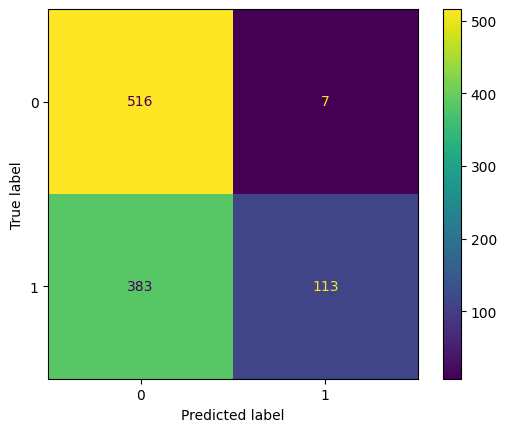

In [70]:
grid_rus_cm = confusion_matrix(y_rus_test, grid_rus_pred)
grid_rus_disp = ConfusionMatrixDisplay(confusion_matrix=grid_rus_cm, display_labels=rfc_rus.classes_)
grid_rus_disp.plot()

In [71]:
print(classification_report(y_rus_test, grid_rus_pred))

              precision    recall  f1-score   support

           0       0.57      0.99      0.73       523
           1       0.94      0.23      0.37       496

    accuracy                           0.62      1019
   macro avg       0.76      0.61      0.55      1019
weighted avg       0.75      0.62      0.55      1019



##**For Over Sample data**

In [72]:
# Tuning Model for under sample data
rfc_ros = RandomForestClassifier()
# Fit data on tuning model
rfc_ros.fit(X_ros_train, y_ros_train)

RandomForestClassifier()

###Prediction
###Random Over Sample Data

In [73]:
# predict on tuning model
y_pred_ros = rfc_ros.predict(X_ros_test)

###Model Accuracy

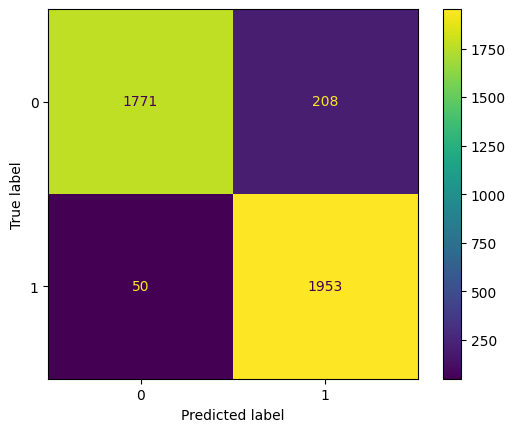

In [74]:
ros_cm = confusion_matrix(y_ros_test, y_pred_ros)
ros_disp = ConfusionMatrixDisplay(confusion_matrix=ros_cm, display_labels=rfc_ros.classes_)
ros_disp.plot()

In [75]:
print(classification_report(y_ros_test, y_pred_ros))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1979
           1       0.90      0.98      0.94      2003

    accuracy                           0.94      3982
   macro avg       0.94      0.93      0.94      3982
weighted avg       0.94      0.94      0.94      3982



Fit Over Sample Data on tuning model

In [ ]:
grid_ros = GridSearchCV(pipeline, param_grid, refit=True, verbose=1, cv=2)
grid_ros.fit(X_ros_train, y_ros_train)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


In [ ]:
print(grid_ros.best_estimator_)

###Predict
###Under sample data with tuning

In [ ]:
grid_ros_pred = grid.predict(X_ros_test)

###Model Accuracy after fitting on tuning model

In [ ]:
ros_cm = confusion_matrix(y_ros_test, y_pred_ros)
ros_disp = ConfusionMatrixDisplay(confusion_matrix=ros_cm, display_labels=rfc_ros.classes_)
ros_disp.plot()

In [ ]:
print(classification_report(y_ros_test, grid_ros_pred))

In [ ]:
# Print all classification before tuning model
print(classification_report(y_test, y_pred))
print(classification_report(y_rus_test, y_pred_rus))
print(classification_report(y_ros_test, y_pred_ros))

#**Explanation**

This model is used to analyse the Bank data to predict the Churning and it has a good accuracy after dealing with imbalance. On oversample data, it gives a good accuracy.